In [3]:
import os
import tensorflow
from keras.models import Sequential
from keras.layers import Activation, Conv2D, Dropout, MaxPooling2D, UpSampling2D
from keras.optimizers import Adadelta
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from skimage.io import imread

## 1. Read images

In [4]:
TRAIN_IMG_PATH = 'banco_dados_SB/train/imagens/'
TRAIN_LBL_PATH = 'banco_dados_SB/train/classes/'

TEST_IMG_PATH = 'banco_dados_SB/test/imagens/'
TEST_LBL_PATH = 'banco_dados_SB/test/classes/'

In [5]:
X_train = [imread(fname=TRAIN_IMG_PATH + img, as_grey=True) for img in os.listdir(TRAIN_IMG_PATH)]
y_train = [imread(fname=TRAIN_LBL_PATH + lbl)[:, :, 0] for lbl in os.listdir(TRAIN_LBL_PATH)]

In [6]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [7]:
X_test = [imread(fname=TEST_IMG_PATH + img, as_grey=True) for img in os.listdir(TEST_IMG_PATH)]
y_test = [imread(fname=TEST_LBL_PATH + lbl)[:, :, 0] for lbl in os.listdir(TEST_LBL_PATH)]

In [8]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

### Testing data set

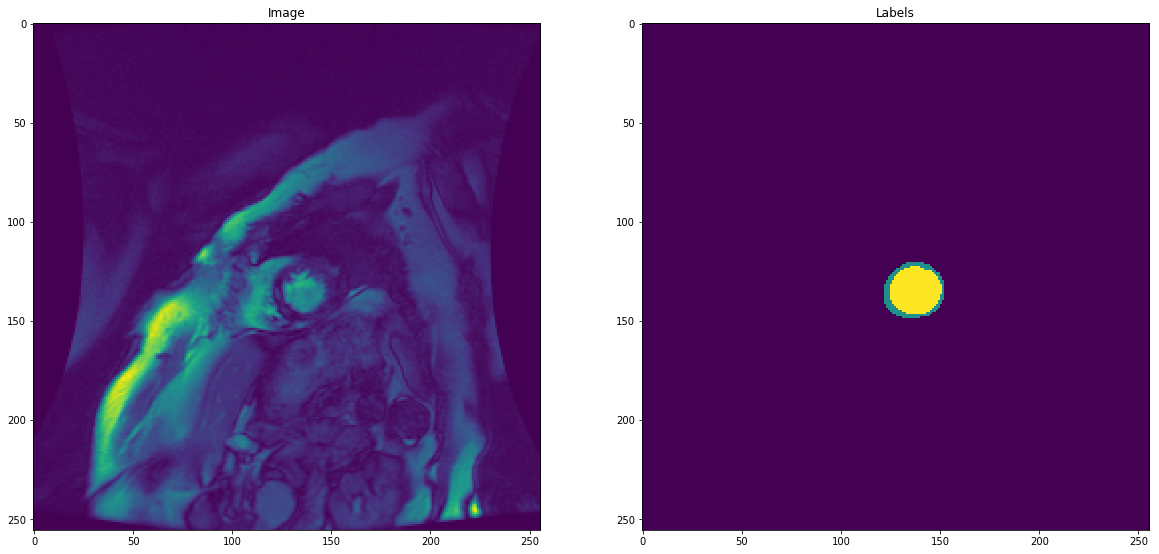

In [9]:
idx = 10

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(X_train[idx])
ax[0].set_title('Image')

ax[1].imshow(y_train[idx])
ax[1].set_title('Labels')

plt.show()

## 2. Create CNN model

In [10]:
input_shape = (X_train[0].shape[0], X_train[0].shape[1], 1)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (7, 7), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(512, (7, 7), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(3, (7, 7), activation='relu', padding='same'))
model.add(UpSampling2D(size=(8, 8)))
model.add(Activation(activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 256)       295168    
__________

In [12]:
model.compile(loss='binary_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

## 3. Prepare data

In [13]:
# Reshape input images to fit TensorFlow shape pattern
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [14]:
# One hot encoded label images
y_train_ohe = np.zeros((y_train.shape[0], y_train.shape[1], y_train.shape[2], 3))
y_test_ohe = np.zeros((y_test.shape[0], y_test.shape[1], y_test.shape[2], 3))

In [15]:
y_train_ohe[:, :, :, 0] = np.where(y_train == 0, 1, 0)
y_train_ohe[:, :, :, 1] = np.where(y_train == 1, 1, 0)
y_train_ohe[:, :, :, 2] = np.where(y_train == 2, 1, 0)

In [16]:
y_test_ohe[:, :, :, 0] = np.where(y_test == 0, 1, 0)
y_test_ohe[:, :, :, 1] = np.where(y_test == 1, 1, 0)
y_test_ohe[:, :, :, 2] = np.where(y_test == 2, 1, 0)

## 4. Train model

In [17]:
batch_size = 8
epochs = 10

model.fit(X_train, y_train_ohe,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test_ohe))

Train on 338 samples, validate on 82 samples
Epoch 1/10
338/338 [==============================] - 615s - loss: 0.3451 - acc: 0.9536 - val_loss: 0.3151 - val_acc: 0.9804
Epoch 2/10
338/338 [==============================] - 612s - loss: 0.3213 - acc: 0.9800 - val_loss: 0.3150 - val_acc: 0.9804
Epoch 3/10
256/338 [=====================>........] - ETA: 137s - loss: 0.3173 - acc: 0.9802

KeyboardInterrupt: 